In [1]:
import numpy as np
import seaborn as sns  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
data.shape

(100000, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

##### We can se that there are no null values

In [9]:
data.duplicated().sum()

3854

#### We can see that we have 3854 duplicated data

### Data cleaning

In [10]:
data=data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

#### We have successfully removed all the duplicated data

In [12]:
data["gender"].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

#### We have a 3rd category in the Gender which is "other" so we need to drop it

In [13]:
data[data['gender']=='Other'].index

Index([12669, 14838, 16702, 18691, 23266, 31985, 33805, 34929, 35006, 40337,
       56238, 66595, 66887, 67204, 68484, 71139, 75302, 75734],
      dtype='int64')

#### Dropping the rows that have category "other"

In [14]:
data.drop(data[data['gender']=='Other'].index, inplace=True)

In [15]:
data["gender"].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [16]:
data["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

#### We are assigning new values to the unique values of "smoking_history" so that we have only 3 categories

In [17]:
new_categories = {"never": "Not smoke", "No Info": "Not smoke", "current": "Smokes", "ever": "Smokes", "former": "Ex smoker", "not current": "Ex smoker"}
data['smoking_history']= data['smoking_history'].map(new_categories)

In [18]:
data["smoking_history"].unique()

array(['Not smoke', 'Smokes', 'Ex smoker'], dtype=object)

## Exploratory data analysis

##### Encoding the gender column which has only 2 categories

In [19]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [20]:
gender=enc.fit_transform(data["gender"])

In [21]:
data["gender"]=gender

In [22]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,Not smoke,25.19,6.6,140,0
1,0,54.0,0,0,Not smoke,27.32,6.6,80,0
2,1,28.0,0,0,Not smoke,27.32,5.7,158,0
3,0,36.0,0,0,Smokes,23.45,5.0,155,0
4,1,76.0,1,1,Smokes,20.14,4.8,155,0


##### Searching for outliers

<Axes: >

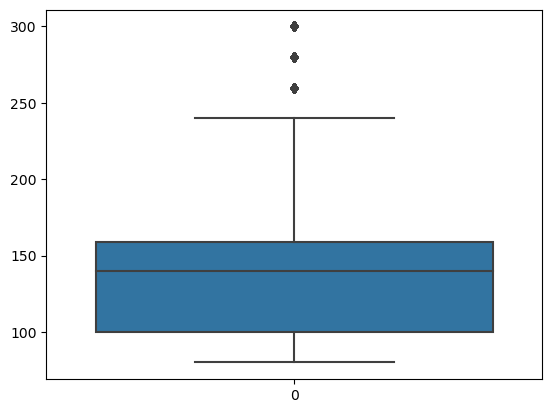

In [23]:
sns.boxplot(data["blood_glucose_level"])

#### Here we can see that the column "blood_glucose_level" has some outliers

#### Removing the outliers

In [24]:
q1=data['blood_glucose_level'].quantile(0.25)
q3=data['blood_glucose_level'].quantile(0.75)
IQR=q3-q1

In [25]:
q1,q3,IQR

(100.0, 159.0, 59.0)

In [26]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(11.5, 247.5)

In [27]:
data.loc[(data['blood_glucose_level']> upper_limit) | (data['blood_glucose_level']< lower_limit)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
38,1,50.0,1,0,Smokes,27.32,5.7,260,1
94,0,60.0,0,0,Not smoke,27.32,7.5,300,1
104,0,80.0,1,0,Not smoke,27.32,6.8,280,1
125,0,77.0,0,0,Not smoke,31.70,6.5,280,1
142,0,80.0,0,0,Ex smoker,21.97,7.0,300,1
...,...,...,...,...,...,...,...,...,...
99763,0,50.0,0,0,Not smoke,35.91,6.0,280,1
99826,1,63.0,0,1,Not smoke,27.32,6.6,300,1
99867,1,64.0,1,0,Ex smoker,33.12,5.7,300,1
99938,1,55.0,0,1,Ex smoker,30.42,6.2,300,1


In [28]:
data=data.copy()
data.loc[(data['blood_glucose_level']>upper_limit), 'blood_glucose_level']=upper_limit
data.loc[(data['blood_glucose_level']<lower_limit), 'blood_glucose_level']=lower_limit

<Axes: >

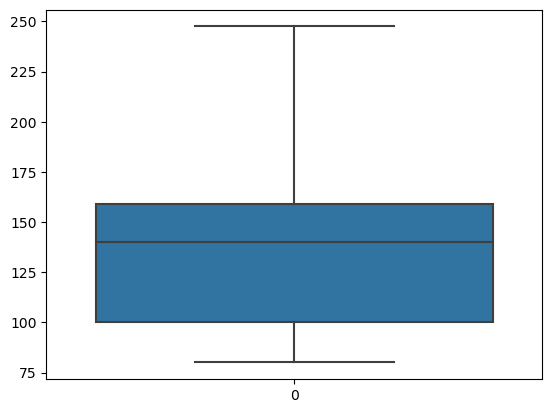

In [29]:
sns.boxplot(data['blood_glucose_level'])

#### We have successfully removed the outliers

<Axes: >

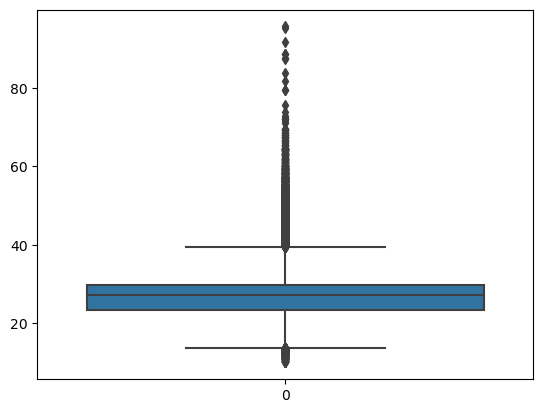

In [30]:
sns.boxplot(data["bmi"])

#### Here we can clearly see that the column "bmi" has a lot of outliers which needs to be removed

In [31]:
q1=data['bmi'].quantile(0.25)
q3=data['bmi'].quantile(0.75)
IQR=q3-q1

In [32]:
q1,q3,IQR

(23.4, 29.86, 6.460000000000001)

In [33]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(13.709999999999997, 39.55)

In [34]:
data.loc[(data['bmi']> upper_limit) | (data['bmi']< lower_limit)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
11,0,54.0,0,0,Ex smoker,54.70,6.0,100.0,0
39,0,34.0,0,0,Not smoke,56.43,6.2,200.0,0
59,0,67.0,0,0,Not smoke,63.48,8.8,155.0,1
93,1,38.0,0,0,Not smoke,55.61,6.5,130.0,0
98,0,30.0,0,0,Not smoke,50.13,6.0,100.0,0
...,...,...,...,...,...,...,...,...,...
99933,0,5.0,0,0,Not smoke,13.34,6.5,155.0,0
99948,0,56.0,1,0,Ex smoker,39.62,4.5,126.0,0
99953,0,59.0,1,0,Smokes,60.52,3.5,158.0,0
99960,0,47.0,0,0,Ex smoker,45.15,4.0,126.0,0


In [35]:
data=data.copy()
data.loc[(data['bmi']>upper_limit), 'bmi']=upper_limit
data.loc[(data['bmi']<lower_limit), 'bmi']=lower_limit

<Axes: >

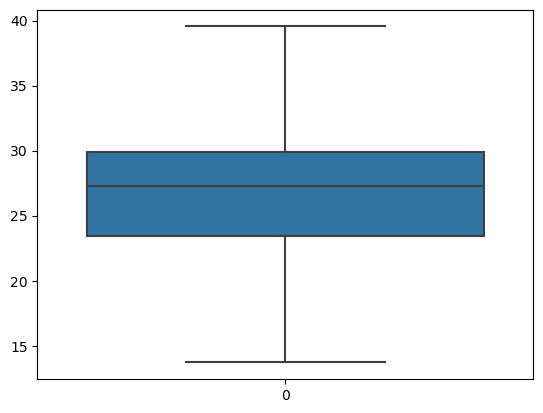

In [36]:
sns.boxplot(data['bmi'])

#### We have removed all the outliers of "bmi" column

## Data visulaization

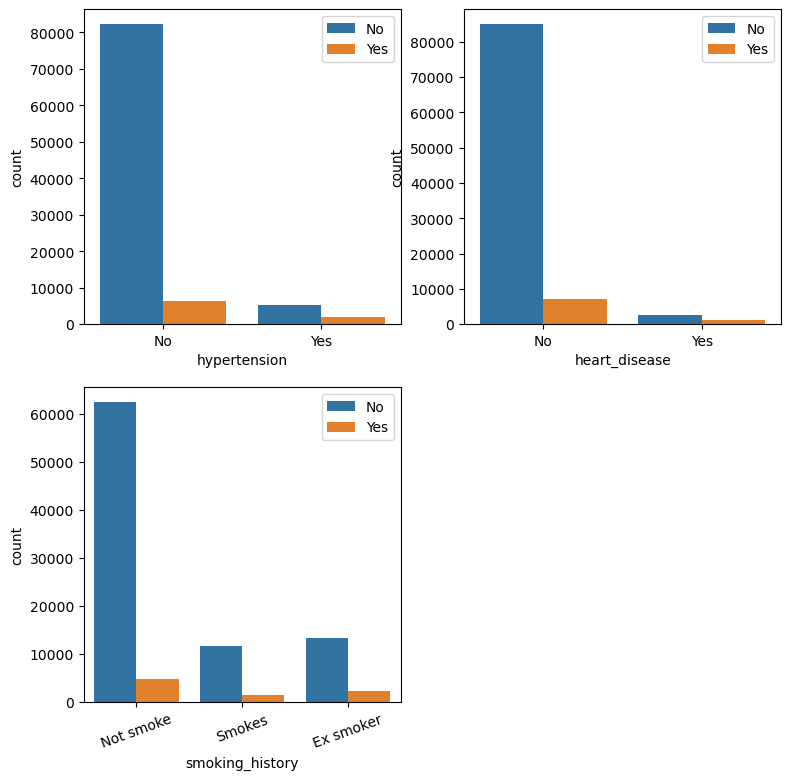

In [37]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)           
sns.countplot(x='hypertension',hue='diabetes',data=data)
plt.xticks([0,1],['No','Yes'])
plt.legend(labels=['No','Yes'])
plt.subplot(2,2,2)           
sns.countplot(x='heart_disease',hue='diabetes',data=data)
plt.xticks([0,1],['No','Yes'])
plt.legend(labels=['No','Yes'])
plt.subplot(2,2,3)           
sns.countplot(x='smoking_history',hue='diabetes',data=data)
plt.xticks([0,1,2],['Not smoke','Smokes','Ex smoker'])
plt.legend(labels=['No','Yes'])
plt.xticks(rotation=20)
plt.show()

#### We can see that around 7000 patients with no hypertension have diabetes whereas around 1500 patients with hypertension have stroke

#### We can also see that around 8000 patients with no heart disease have diabetes whereas around 1000 patients with hear disease have diabetes

#### We can also see that the non smokers category has the highest number of diabetic patients

<Axes: xlabel='diabetes', ylabel='bmi'>

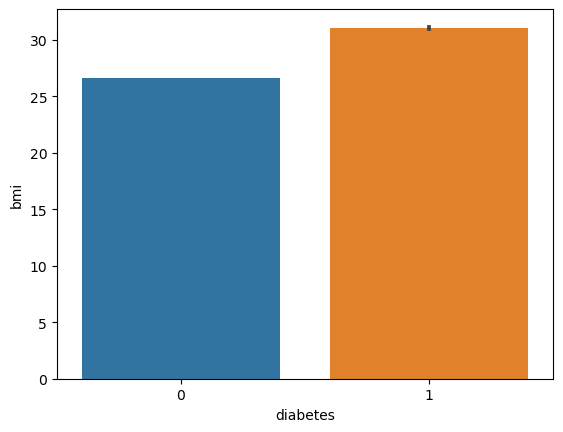

In [38]:
sns.barplot(x='diabetes',y='bmi',data=data)

#### Here we can infer that the average bmi of non-diabetic patients lies around 27 whereas the bmi of patients having diabetes is 30 or above

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

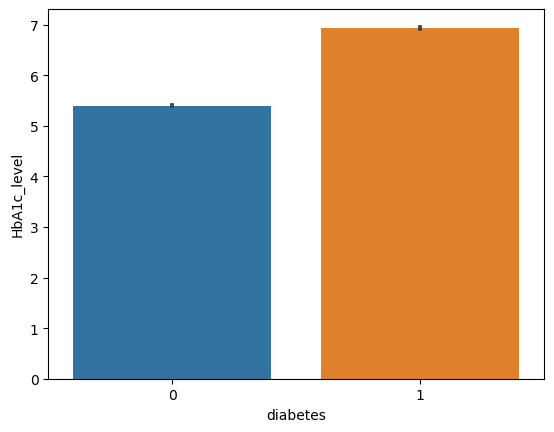

In [39]:
sns.barplot(x='diabetes',y='HbA1c_level',data=data)

#### Here we can infer that the average HbA1c level of non-diabetic patients lies around 5.5 whereas the HbA1c level of patients having diabetes is close to 7 

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

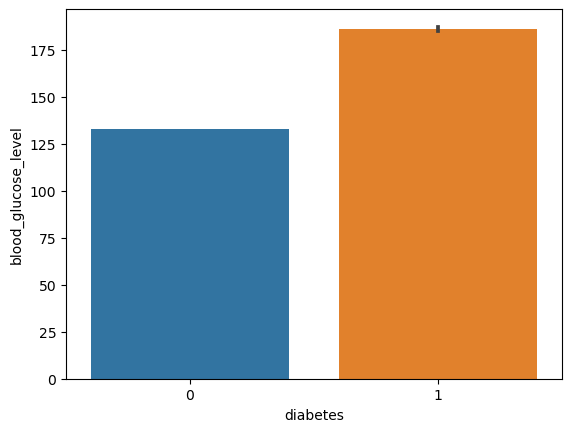

In [40]:
sns.barplot(x='diabetes',y='blood_glucose_level',data=data)

#### We can see that the average blood glucose level of non-diabetic patients is 130 and the same for diabetic patients is around 180 

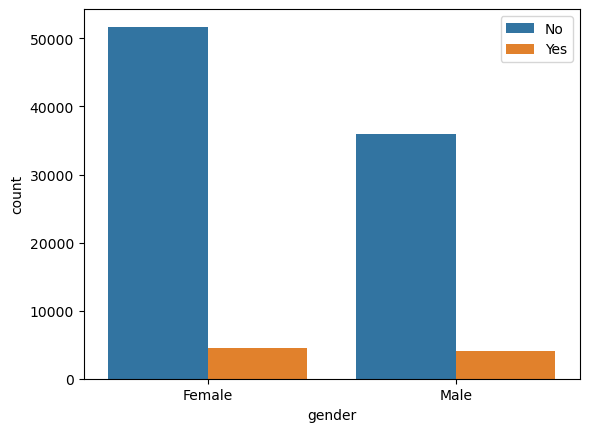

In [41]:
sns.countplot(x=data["gender"], hue=data['diabetes'])
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No','Yes'])
plt.show()

#### Here we can infer that the count of diabetic female patients is slightly more than that of male diabetic patients

C:\Users\SIMRAN SHAIKH\AppData\Local\Temp\ipykernel_27820\1756042454.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diabetes'] == 0]["age"], color='green', label='No Diabetes')
C:\Users\SIMRAN SHAIKH\AppData\Local\Temp\ipykernel_27820\1756042454.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

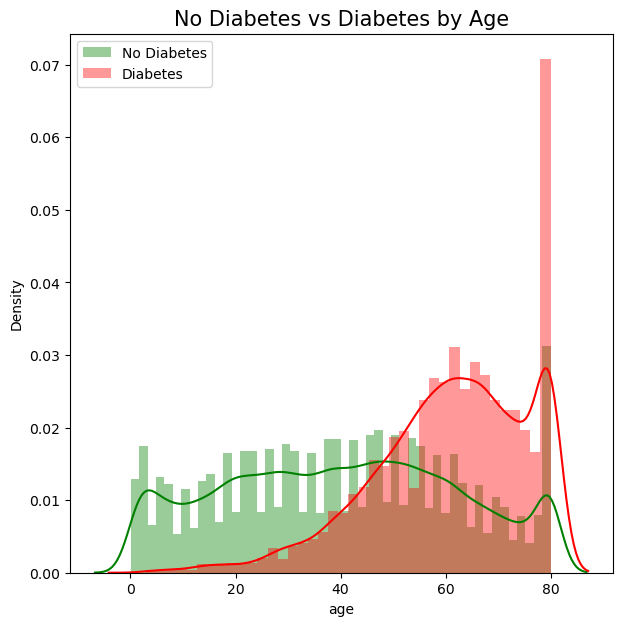

In [42]:
plt.figure(figsize=(7,7))
sns.distplot(data[data['diabetes'] == 0]["age"], color='green', label='No Diabetes')
sns.distplot(data[data['diabetes'] == 1]["age"], color='red', label='Diabetes')
plt.title('No Diabetes vs Diabetes by Age', fontsize=15)
plt.legend()
plt.show()

#### Here we can clearly see that most of the patients who don't have diabetes lie in the age between 1-40 whereas the patients having diabetes lie in the age between 55-80. We can infer that old aged people are likely to get diabetes 

#### Encoding the column "smoking_history" which has more than 2 categories

In [43]:
smoke_hist=pd.get_dummies(data["smoking_history"],drop_first=True)

In [44]:
data=pd.concat([data,smoke_hist],axis=1)

In [45]:
data.drop(["smoking_history"],axis=1,inplace=True)

In [46]:
data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Not smoke,Smokes
0,0,80.0,0,1,25.19,6.6,140.0,0,True,False
1,0,54.0,0,0,27.32,6.6,80.0,0,True,False
2,1,28.0,0,0,27.32,5.7,158.0,0,True,False
3,0,36.0,0,0,23.45,5.0,155.0,0,False,True
4,1,76.0,1,1,20.14,4.8,155.0,0,False,True


In [47]:
data['diabetes'].value_counts()

diabetes
0    87646
1     8482
Name: count, dtype: int64

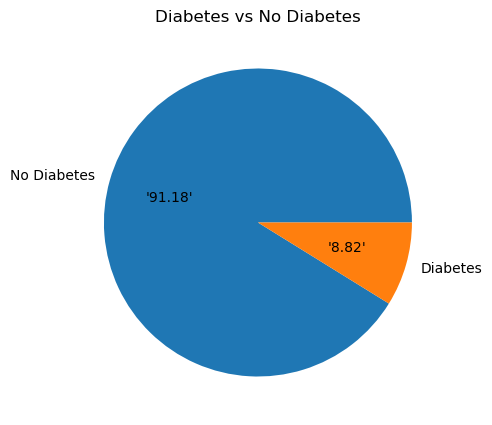

In [48]:
plt.figure(figsize=(8,5))
plt.title('Diabetes vs No Diabetes')
plt.pie(data['diabetes'].value_counts(),labels=["No Diabetes",'Diabetes'],autopct="'%.2f'")
plt.show()

#### Here we can infer that our data has 91% non-diabetic patients and only 9% diabetic patients which means our data is imbalanced and will create biasness in predicting the diabetes. We need to use sampling techniques to balance the data

In [49]:
count_class_0,count_class_1=data.diabetes.value_counts()
df_class_0=data[data["diabetes"]==0]
df_class_1=data[data["diabetes"]==1]

In [50]:
count_class_0,count_class_1

(87646, 8482)

#### Here we can see that we have 87646 non diabetic patients and only 8482 diabetic patients

In [51]:
df_class_0.shape

(87646, 10)

In [52]:
df_class_1.shape

(8482, 10)

#### Here we are using under sampling technique because when we are using over sampling technique, we are generating 87646 data for both diabetic and non diabetic patients so the jupyter notebook is not able to handle such huge amount of data and the notebook is getting lagged

#### Creating the undersamping data

In [53]:
df_class_0_under=df_class_0.sample(count_class_1)

In [54]:
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.diabetes.value_counts()

diabetes
0    8482
1    8482
Name: count, dtype: int64

#### Here we have overcome the imbalanced data condition by undersampling technique and now we have equal number of diabetic and non-diabeteic patients

### Building the model with the undersamped data

In [55]:
x=df_test_under.drop("diabetes",axis=1)
y=df_test_under['diabetes']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

### 1) Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_1 = logreg.predict(x_test)

C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Printing classification report

In [60]:
from sklearn.metrics import classification_report,accuracy_score

In [61]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2558
           1       0.86      0.85      0.86      2532

    accuracy                           0.86      5090
   macro avg       0.86      0.86      0.86      5090
weighted avg       0.86      0.86      0.86      5090



### Hyperparameter tuning for Logistic Regression

In [62]:
param_grid_1=[{"penalty":["l1","l2","none"],
            "C":np.logspace(4,15),
            "solver":["lbfgs","liblinear"],
            "max_iter":[5,10,20]}]

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
clf_1=GridSearchCV(logreg,param_grid=param_grid_1,cv=3,verbose=True,n_jobs=-1)

In [65]:
best_clf_1=clf_1.fit(x_train,y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.p

In [66]:
best_clf_1.best_params_

{'C': 91029817799.15227,
 'max_iter': 20,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [67]:
y_pred_1=clf_1.predict(x_test)

In [68]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2558
           1       0.87      0.87      0.87      2532

    accuracy                           0.87      5090
   macro avg       0.87      0.87      0.87      5090
weighted avg       0.87      0.87      0.87      5090



## Printing the confusion matrix

In [69]:
from sklearn import metrics

In [70]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred_1)
cf_matrix

array([[2229,  329],
       [ 322, 2210]], dtype=int64)

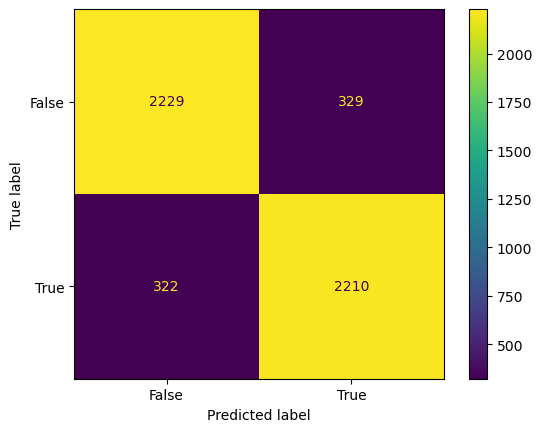

In [71]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### 2) Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(x_train, y_train)
y_pred_2 = treemodel.predict(x_test)

In [74]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2558
           1       1.00      0.67      0.80      2532

    accuracy                           0.84      5090
   macro avg       0.88      0.83      0.83      5090
weighted avg       0.88      0.84      0.83      5090



### Hyperparameter tuning for Decision Tree

In [75]:
param_grid_2=[{
    'criterion':['gini','entropy','log-loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4],
    'max_features':['auto','sqrt','log2']}]

In [76]:
clf_2=GridSearchCV(treemodel,param_grid=param_grid_2,cv=4,scoring='accuracy')

In [77]:
best_clf_2=clf_2.fit(x_train,y_train)

C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\

In [78]:
best_clf_2.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [79]:
y_pred_2=clf_2.predict(x_test)

In [80]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2558
           1       0.87      0.85      0.86      2532

    accuracy                           0.86      5090
   macro avg       0.86      0.86      0.86      5090
weighted avg       0.86      0.86      0.86      5090



In [81]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred_2)
cf_matrix

array([[2250,  308],
       [ 384, 2148]], dtype=int64)

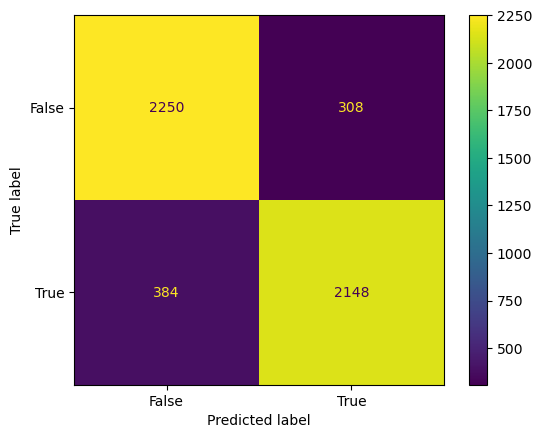

In [82]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### 3) Support Vector Machine

In [83]:
from sklearn.svm import SVC

In [84]:
svmodel=SVC()
svmodel.fit(x_train,y_train)
y_pred_3=svmodel.predict(x_test)

In [85]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2558
           1       0.83      0.90      0.86      2532

    accuracy                           0.86      5090
   macro avg       0.86      0.86      0.86      5090
weighted avg       0.86      0.86      0.86      5090



### Hyperparameter tuning of Support vector machine

In [86]:
param_grid_3={'C': [1,3], 
              'kernel': ['rbf',"poly","linear"]}

In [87]:
clf_3=GridSearchCV(svmodel,param_grid=param_grid_3,cv=2,verbose=3,refit=True,)

In [88]:
best_clf_3=clf_3.fit(x_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ...................C=1, kernel=rbf;, score=0.838 total time=   5.6s
[CV 2/2] END ...................C=1, kernel=rbf;, score=0.846 total time=   5.9s
[CV 1/2] END ..................C=1, kernel=poly;, score=0.845 total time=   1.7s
[CV 2/2] END ..................C=1, kernel=poly;, score=0.850 total time=   1.9s
[CV 1/2] END ................C=1, kernel=linear;, score=0.886 total time=  19.2s
[CV 2/2] END ................C=1, kernel=linear;, score=0.885 total time=  19.7s
[CV 1/2] END ...................C=3, kernel=rbf;, score=0.863 total time=   5.2s
[CV 2/2] END ...................C=3, kernel=rbf;, score=0.868 total time=   3.8s
[CV 1/2] END ..................C=3, kernel=poly;, score=0.869 total time=   2.7s
[CV 2/2] END ..................C=3, kernel=poly;, score=0.869 total time=   2.7s
[CV 1/2] END ................C=3, kernel=linear;, score=0.886 total time=  45.0s
[CV 2/2] END ................C=3, kernel=linear;,

In [89]:
best_clf_3.best_params_

{'C': 3, 'kernel': 'linear'}

In [90]:
y_pred_3=clf_3.predict(x_test)

In [91]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2558
           1       0.87      0.89      0.88      2532

    accuracy                           0.88      5090
   macro avg       0.88      0.88      0.88      5090
weighted avg       0.88      0.88      0.88      5090



In [92]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred_3)
cf_matrix

array([[2232,  326],
       [ 278, 2254]], dtype=int64)

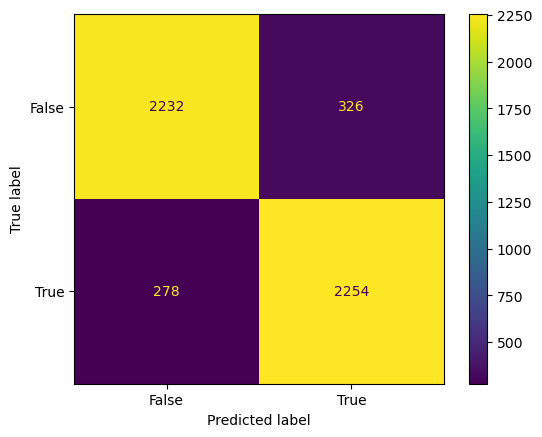

In [93]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()